In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.shape

(1599, 12)

In [4]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<AxesSubplot:xlabel='quality', ylabel='count'>

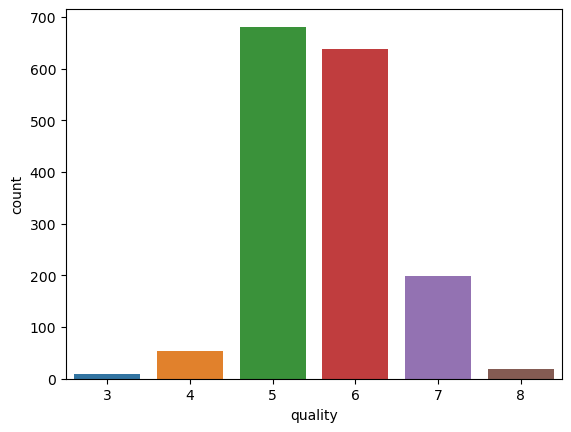

In [7]:
sns.countplot(x='quality',data=data)

<AxesSubplot:>

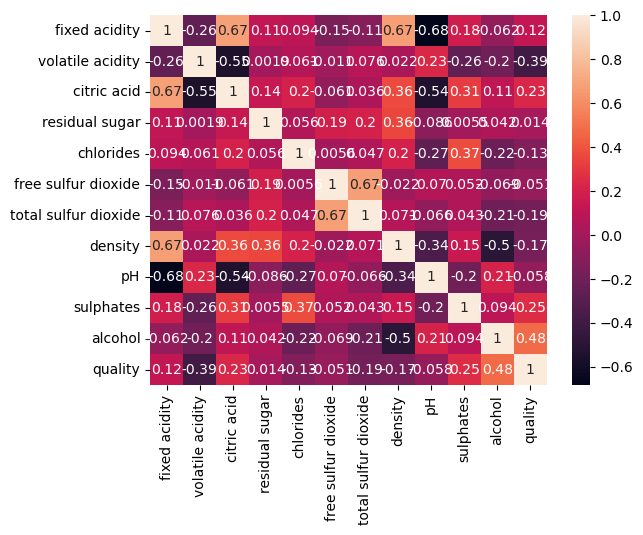

In [8]:
corr = data.corr()
sns.heatmap(corr,annot=True)

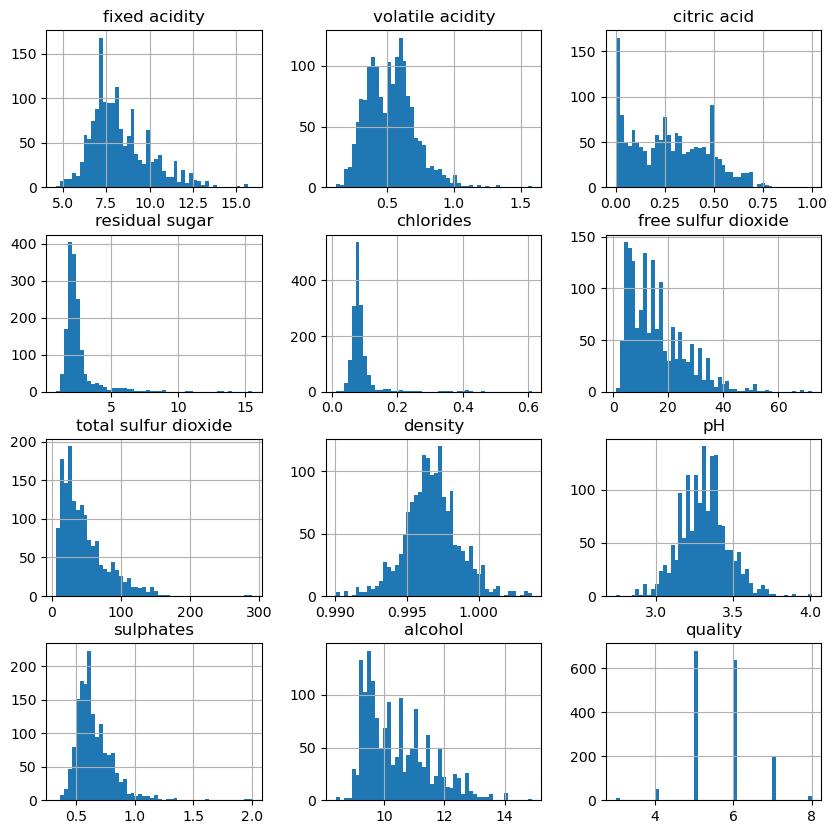

In [9]:
data.hist(figsize=(10,10),bins=50)
plt.show()

fixed acidity              AxesSubplot(0.125,0.11;0.0545775x0.77)
volatile acidity        AxesSubplot(0.190493,0.11;0.0545775x0.77)
citric acid             AxesSubplot(0.255986,0.11;0.0545775x0.77)
residual sugar          AxesSubplot(0.321479,0.11;0.0545775x0.77)
chlorides               AxesSubplot(0.386972,0.11;0.0545775x0.77)
free sulfur dioxide     AxesSubplot(0.452465,0.11;0.0545775x0.77)
total sulfur dioxide    AxesSubplot(0.517958,0.11;0.0545775x0.77)
density                 AxesSubplot(0.583451,0.11;0.0545775x0.77)
pH                      AxesSubplot(0.648944,0.11;0.0545775x0.77)
sulphates               AxesSubplot(0.714437,0.11;0.0545775x0.77)
alcohol                  AxesSubplot(0.77993,0.11;0.0545775x0.77)
quality                 AxesSubplot(0.845423,0.11;0.0545775x0.77)
dtype: object

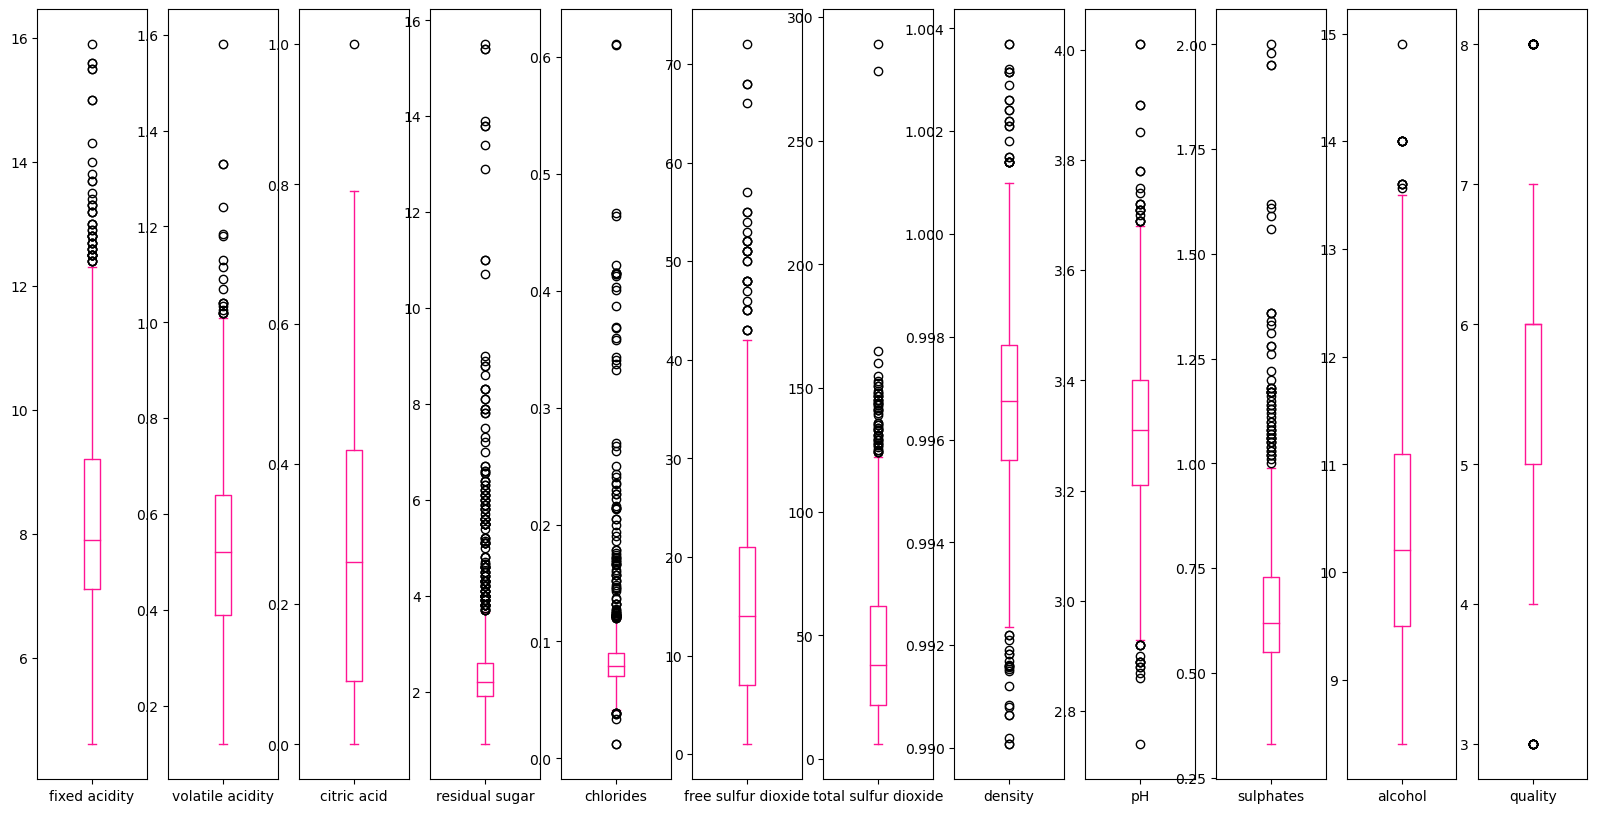

In [10]:
data.plot(kind="box",subplots=True,sharex=False,sharey=False,figsize=(20,10),color='deeppink')

In [11]:
def outliers(df,ft):
    Q1=df[ft].quantile(0.25)
    Q3=df[ft].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    ls=df.index[(df[ft]<lower_bound)|(df[ft]>upper_bound)]
    return ls

In [12]:
index_list=[]
for feature in ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']:
    index_list.extend(outliers(data,feature))

In [13]:
for i in index_list:
    print(i,end=" ")

205 206 243 244 264 294 328 338 339 347 353 359 363 364 366 374 381 391 394 409 429 440 442 446 470 472 509 510 516 538 544 548 554 555 557 559 560 564 565 596 599 601 603 611 652 680 811 814 1224 38 94 120 126 127 134 199 553 672 690 700 705 710 724 899 1261 1299 1312 1467 151 9 11 14 15 18 33 35 39 40 55 57 64 65 154 155 156 157 163 164 192 215 269 270 271 272 274 275 277 278 279 283 324 325 327 353 364 366 374 375 378 395 396 400 408 409 413 415 442 455 480 484 494 501 502 510 515 516 538 539 541 554 555 556 557 558 559 564 595 606 608 624 625 645 649 652 659 690 705 719 740 800 878 884 889 903 904 910 911 913 917 923 941 944 946 974 1032 1038 1043 1056 1057 1059 1071 1074 1077 1078 1079 1081 1086 1094 1096 1114 1133 1138 1147 1176 1186 1190 1203 1226 1235 1239 1244 1257 1276 1288 1289 1295 1296 1307 1331 1358 1373 1388 1394 1406 1412 1423 1434 1435 1437 1441 1445 1471 1474 1476 1478 1501 1514 1515 1540 1552 1558 1574 1577 1589 14 15 17 19 38 42 81 83 106 109 120 125 147 151 169 181

In [14]:
def remove(df,ls):
    ls=sorted(set(ls))
    df=df.drop(ls)
    return df

In [15]:
data_cleaned=remove(data,index_list)

In [16]:
data_cleaned.shape

(1179, 12)

fixed acidity              AxesSubplot(0.125,0.11;0.0545775x0.77)
volatile acidity        AxesSubplot(0.190493,0.11;0.0545775x0.77)
citric acid             AxesSubplot(0.255986,0.11;0.0545775x0.77)
residual sugar          AxesSubplot(0.321479,0.11;0.0545775x0.77)
chlorides               AxesSubplot(0.386972,0.11;0.0545775x0.77)
free sulfur dioxide     AxesSubplot(0.452465,0.11;0.0545775x0.77)
total sulfur dioxide    AxesSubplot(0.517958,0.11;0.0545775x0.77)
density                 AxesSubplot(0.583451,0.11;0.0545775x0.77)
pH                      AxesSubplot(0.648944,0.11;0.0545775x0.77)
sulphates               AxesSubplot(0.714437,0.11;0.0545775x0.77)
alcohol                  AxesSubplot(0.77993,0.11;0.0545775x0.77)
quality                 AxesSubplot(0.845423,0.11;0.0545775x0.77)
dtype: object

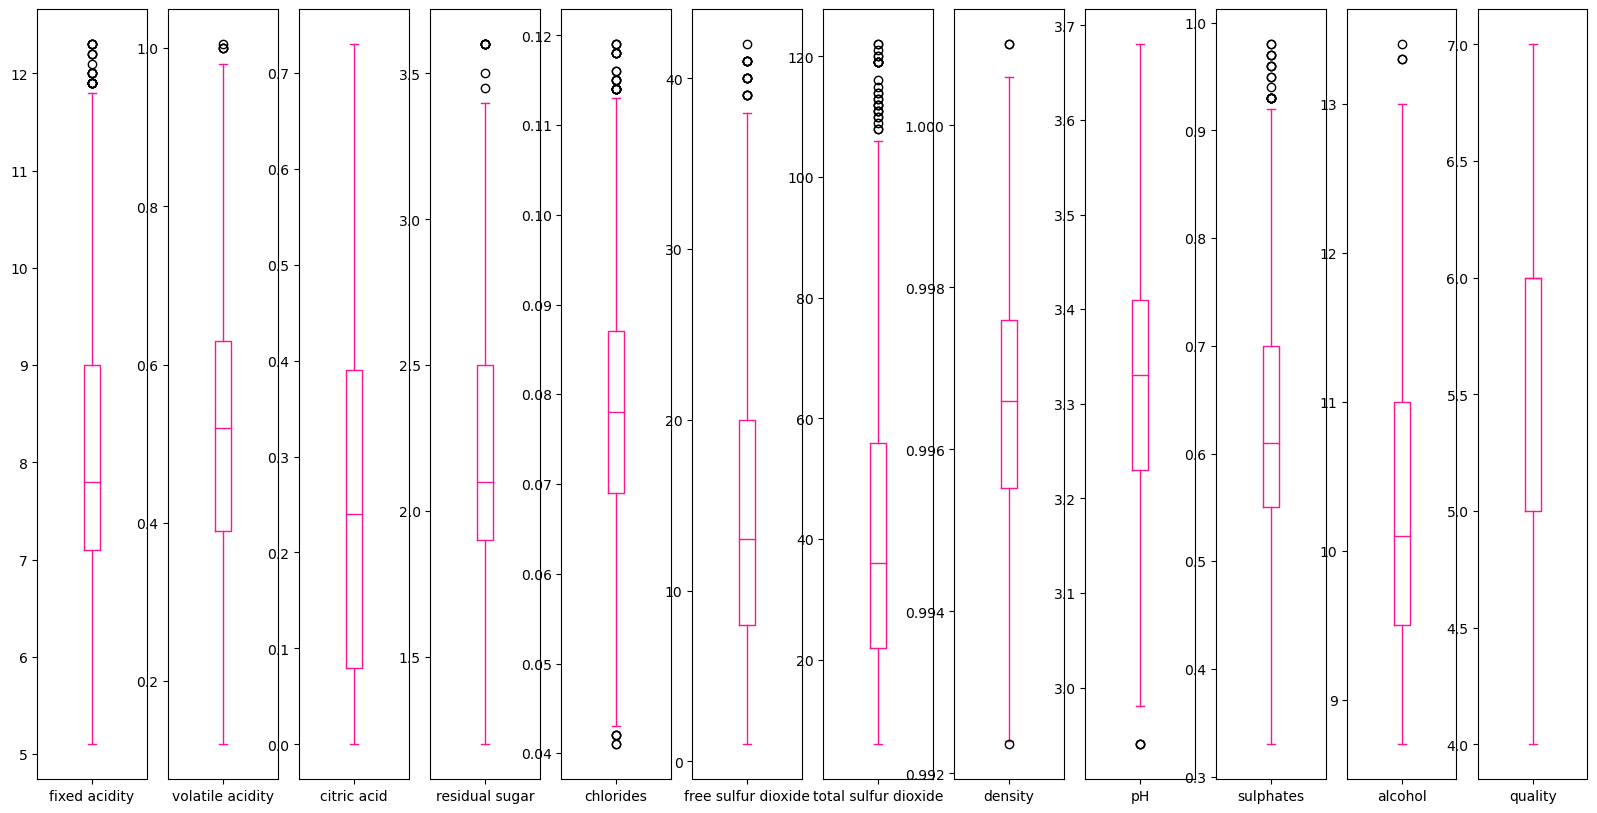

In [17]:
data_cleaned.plot(kind="box",subplots=True,sharex=False,sharey=False,figsize=(20,10),color='deeppink')

In [18]:
data_cleaned = data_cleaned.loc[data_cleaned['fixed acidity']<11,:]
data_cleaned = data_cleaned.loc[data_cleaned['volatile acidity']<0.95,:]
data_cleaned = data_cleaned.loc[data_cleaned['residual sugar']<3.2,:]
data_cleaned = data_cleaned.loc[data_cleaned['chlorides']<0.10,:]
data_cleaned = data_cleaned.loc[data_cleaned['free sulfur dioxide']<35,:]
data_cleaned = data_cleaned.loc[data_cleaned['total sulfur dioxide']<90,:]
data_cleaned = data_cleaned.loc[data_cleaned['density']<1.000,:]
data_cleaned = data_cleaned.loc[data_cleaned['pH']<3.65,:]
data_cleaned = data_cleaned.loc[data_cleaned['sulphates']<0.9,:]
data_cleaned = data_cleaned.loc[data_cleaned['alcohol']<13,:]

In [19]:
data_cleaned = data_cleaned.loc[data_cleaned['sulphates']>0.4,:]
data_cleaned = data_cleaned.loc[data_cleaned['chlorides']>0.05,:]

fixed acidity              AxesSubplot(0.125,0.11;0.0545775x0.77)
volatile acidity        AxesSubplot(0.190493,0.11;0.0545775x0.77)
citric acid             AxesSubplot(0.255986,0.11;0.0545775x0.77)
residual sugar          AxesSubplot(0.321479,0.11;0.0545775x0.77)
chlorides               AxesSubplot(0.386972,0.11;0.0545775x0.77)
free sulfur dioxide     AxesSubplot(0.452465,0.11;0.0545775x0.77)
total sulfur dioxide    AxesSubplot(0.517958,0.11;0.0545775x0.77)
density                 AxesSubplot(0.583451,0.11;0.0545775x0.77)
pH                      AxesSubplot(0.648944,0.11;0.0545775x0.77)
sulphates               AxesSubplot(0.714437,0.11;0.0545775x0.77)
alcohol                  AxesSubplot(0.77993,0.11;0.0545775x0.77)
quality                 AxesSubplot(0.845423,0.11;0.0545775x0.77)
dtype: object

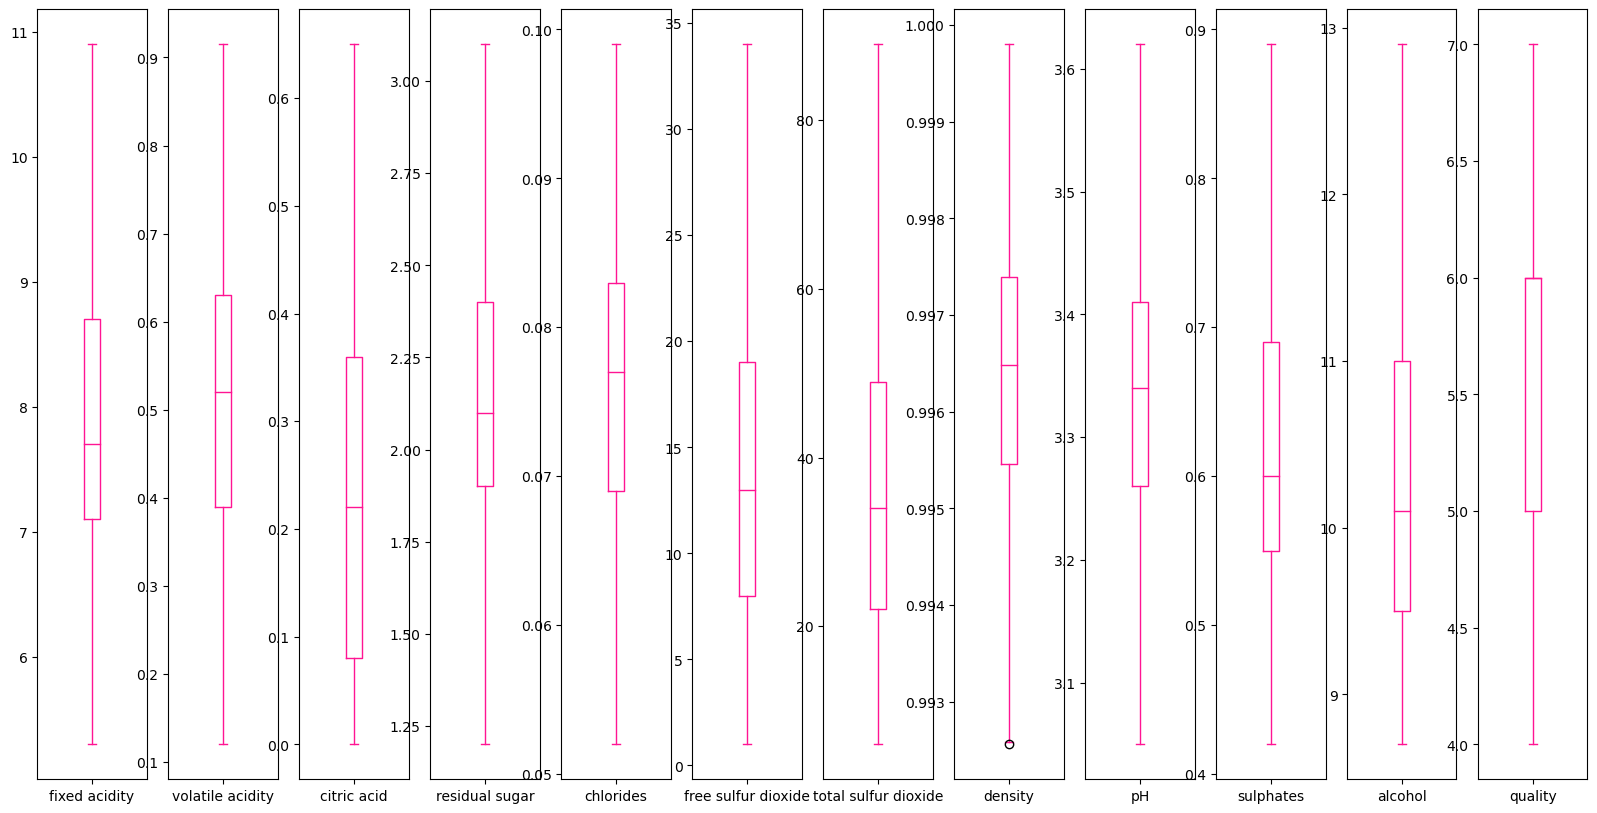

In [20]:
data_cleaned.plot(kind="box",subplots=True,sharex=False,sharey=False,figsize=(20,10),color='deeppink')

In [21]:
data_cleaned['quality'].value_counts()

6    370
5    338
7     95
4     22
Name: quality, dtype: int64

In [22]:
data_cleaned['quality'] = data_cleaned['quality'].map({3 : 'bad', 4 :'bad', 5: 'bad',
                                      6: 'good', 7: 'good', 8: 'good'})

In [23]:
data_cleaned['quality'].value_counts()

good    465
bad     360
Name: quality, dtype: int64

In [24]:
le = LabelEncoder()
data_cleaned['quality'] = le.fit_transform(data_cleaned['quality'])
data_cleaned['quality'].value_counts

<bound method IndexOpsMixin.value_counts of 0       0
1       0
2       0
4       0
5       0
       ..
1592    1
1593    1
1594    0
1596    1
1597    0
Name: quality, Length: 825, dtype: int32>

In [25]:
data_cleaned['quality'].value_counts()

1    465
0    360
Name: quality, dtype: int64

In [26]:
x = data_cleaned.iloc[:,:11]
y = data_cleaned.iloc[:,11]
print(x.shape)
print(y.shape)

(825, 11)
(825,)


In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(577, 11)
(577,)
(248, 11)
(248,)


In [28]:
modelsvm = SVC()
modelsvm.fit(x_train, y_train)
y_predsvmtrain=modelsvm.predict(x_train)
y_predsvmtest=modelsvm.predict(x_test)

In [29]:
ConfusionMatrix=confusion_matrix(y_test,y_predsvmtest)
print(ConfusionMatrix)

[[ 20 100]
 [  7 121]]


In [30]:
print('MAE= ',metrics.mean_absolute_error(y_test,y_predsvmtest))
print('MSE= ',metrics.mean_squared_error(y_test,y_predsvmtest))
print(f"r2 score: {r2_score(y_test,y_predsvmtest)}")
print('Adjusted R2 value= ',1 - (1 - (modelsvm.score(x_test,y_test))) * ((756 - 1)/(756-10-1)))
print('RMSE (train)= ',np.sqrt(mean_squared_error(y_train,y_predsvmtrain)))
print('RMSE (test)= ',np.sqrt(mean_squared_error(y_test,y_predsvmtest)))

MAE=  0.4314516129032258
MSE=  0.4314516129032258
r2 score: -0.7276041666666662
Adjusted R2 value=  0.5627570902792813
RMSE (train)=  0.6146676265764925
RMSE (test)=  0.6568497643321689


In [31]:
modelnb=GaussianNB()
modelnb.fit(x_train,y_train)
y_prednbtrain=modelnb.predict(x_train)
y_prednbtest=modelnb.predict(x_test)

In [32]:
ConfusionMatrix=confusion_matrix(y_test,y_prednbtest)
print(ConfusionMatrix)

[[95 25]
 [45 83]]


In [33]:
print('MAE= ',metrics.mean_absolute_error(y_test,y_prednbtest))
print('MSE= ',metrics.mean_squared_error(y_test,y_prednbtest))
print(f"r2 score: {r2_score(y_test,y_prednbtest)}")
print('Adjusted R2 value= ',1 - (1 - (modelnb.score(x_test,y_test))) * ((756 - 1)/(756-10-1)))
print('RMSE (train)= ',np.sqrt(mean_squared_error(y_train,y_prednbtrain)))
print('RMSE (test)= ',np.sqrt(mean_squared_error(y_test,y_prednbtest)))

MAE=  0.28225806451612906
MSE=  0.28225806451612906
r2 score: -0.13020833333333304
Adjusted R2 value=  0.7139532366313055
RMSE (train)=  0.5298703284685173
RMSE (test)=  0.5312796481290518


In [34]:
modelrfc=RandomForestClassifier(n_estimators = 100)
modelrfc.fit(x_train, y_train)
y_predrfctrain=modelrfc.predict(x_train)
y_predrfctest=modelrfc.predict(x_test)

In [35]:
ConfusionMatrix=confusion_matrix(y_test,y_predrfctest)
print(ConfusionMatrix)

[[ 88  32]
 [ 20 108]]


In [36]:
print('MAE= ',metrics.mean_absolute_error(y_test,y_predrfctest))
print('MSE= ',metrics.mean_squared_error(y_test,y_predrfctest))
print(f"r2 score: {r2_score(y_test,y_predrfctest)}")
print('Adjusted R2 value= ',1 - (1 - (modelrfc.score(x_test,y_test))) * ((756 - 1)/(756-10-1)))
print('RMSE (train)= ',np.sqrt(mean_squared_error(y_train,y_predrfctrain)))
print('RMSE (test)= ',np.sqrt(mean_squared_error(y_test,y_predrfctest)))

MAE=  0.20967741935483872
MSE=  0.20967741935483872
r2 score: 0.16041666666666687
Adjusted R2 value=  0.7875081186403983
RMSE (train)=  0.0
RMSE (test)=  0.4579054698896255


In [37]:
kf=KFold(n_splits=12)
kf

KFold(n_splits=12, random_state=None, shuffle=False)

In [38]:
for train_index,test_index in kf.split(['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']):
    print(train_index,test_index)

[ 1  2  3  4  5  6  7  8  9 10 11] [0]
[ 0  2  3  4  5  6  7  8  9 10 11] [1]
[ 0  1  3  4  5  6  7  8  9 10 11] [2]
[ 0  1  2  4  5  6  7  8  9 10 11] [3]
[ 0  1  2  3  5  6  7  8  9 10 11] [4]
[ 0  1  2  3  4  6  7  8  9 10 11] [5]
[ 0  1  2  3  4  5  7  8  9 10 11] [6]
[ 0  1  2  3  4  5  6  8  9 10 11] [7]
[ 0  1  2  3  4  5  6  7  9 10 11] [8]
[ 0  1  2  3  4  5  6  7  8 10 11] [9]
[ 0  1  2  3  4  5  6  7  8  9 11] [10]
[ 0  1  2  3  4  5  6  7  8  9 10] [11]


In [39]:
def get_score(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    return model.score(x_test,y_test)

In [40]:
get_score(SVC(),x_train,x_test,y_train,y_test)

0.5685483870967742

In [41]:
get_score(GaussianNB(),x_train,x_test,y_train,y_test)

0.717741935483871

In [42]:
get_score(RandomForestClassifier(n_estimators =100),x_train,x_test,y_train,y_test)

0.8024193548387096

In [43]:
import pickle
filename='model.pkl'
pickle.dump(modelrfc,open(filename,'wb'))

In [44]:
load_model=pickle.load(open(filename,'rb'))

In [45]:
load_model.predict([[8.3,0.420,0.38,2.5,0.094,24.0,60.0,0.99790,3.31,0.70,10.8]])

array([1])

In [46]:
x_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1225,9.2,0.460,0.23,2.6,0.091,18.0,77.0,0.99922,3.15,0.51,9.4
386,7.8,0.540,0.26,2.0,0.088,23.0,48.0,0.99810,3.41,0.74,9.2
135,8.4,0.745,0.11,1.9,0.090,16.0,63.0,0.99650,3.19,0.82,9.6
379,8.3,0.420,0.38,2.5,0.094,24.0,60.0,0.99790,3.31,0.70,10.8
658,7.2,0.520,0.07,1.4,0.074,5.0,20.0,0.99730,3.32,0.81,9.6
